# Demonstration of Analyses for "Comparison of Structural and Metabolic Biomarkers of Neurodegeneration for Brain Age Prediction"

**Steps of Analysis:**\
1 - bias-correction\
2 - brain age prediction in cognitively normals (CN)\
2.1 - validation of brain age prediction in CN\
3 - brain age prediction in individuals with mild cognitive impairment (MCI)\
4 - association with cognitive performance/neuropathology

Examplary demonstration for PET modality

In [1]:
from brain_age_main import main
modality = 'PET'

/opt/anaconda/anaconda3/lib/python3.8/site-packages/nilearn/datasets/__init__.py:87: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


### Bias-correction
Comparison of no bia-correction ('None'), correction with chronological age (CA, 'True'), and correction without CA ('False').

1/3 Correction with CA: None 
First column: 17Networks_LH_VisCent_ExStr_1 (should be 'X17Networks_LH_VisCent_ExStr_1')
Last column: CAU-lh (should be 'CAU-lh)
12 individuals younger than 65 years discarded.
Total participants:  438 Inside IQR of all regions:  410 
(28 participants discarded as outliers)
Outliers in train set:  10 Outliers in test set:  18


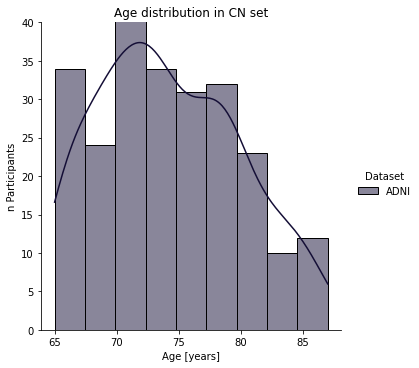

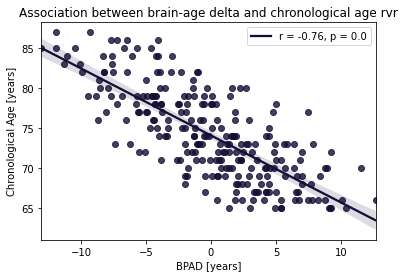

Significant association between  rvr -predicted age delta and CA: True


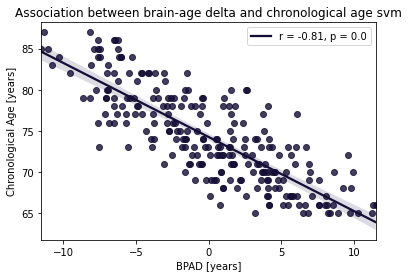

Significant association between  svm -predicted age delta and CA: True
---CROSS-VALIDATION---
 Final model (smallest MAE): rvr
MAE: 4.159630067721588, R2: 0.18397164157995693


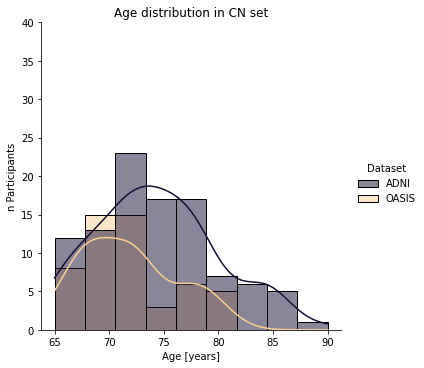

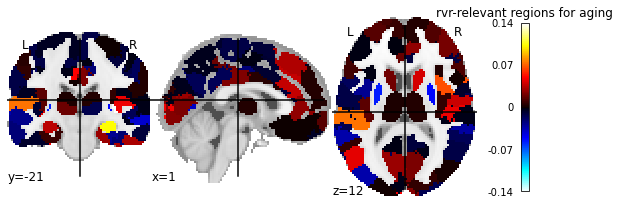

---TEST---
On average, predicted age of CN differed by  0.8662408096411222  years from their chronological age.
MAE = 4.277210966265259, R2 = -0.034118016727668454
ADNI:
MAE = 4.5864648189378165, R2 = -0.04424273416062707
OASIS:
MAE = 3.6765448293435607, R2 = -0.250642319985946




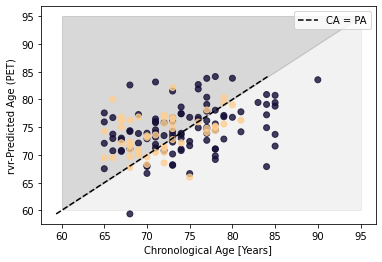

2/3 Correction with CA: True 


In [ ]:
main(1, modality)

## Brain age prediction in CN

In [ ]:
main(2, modality)

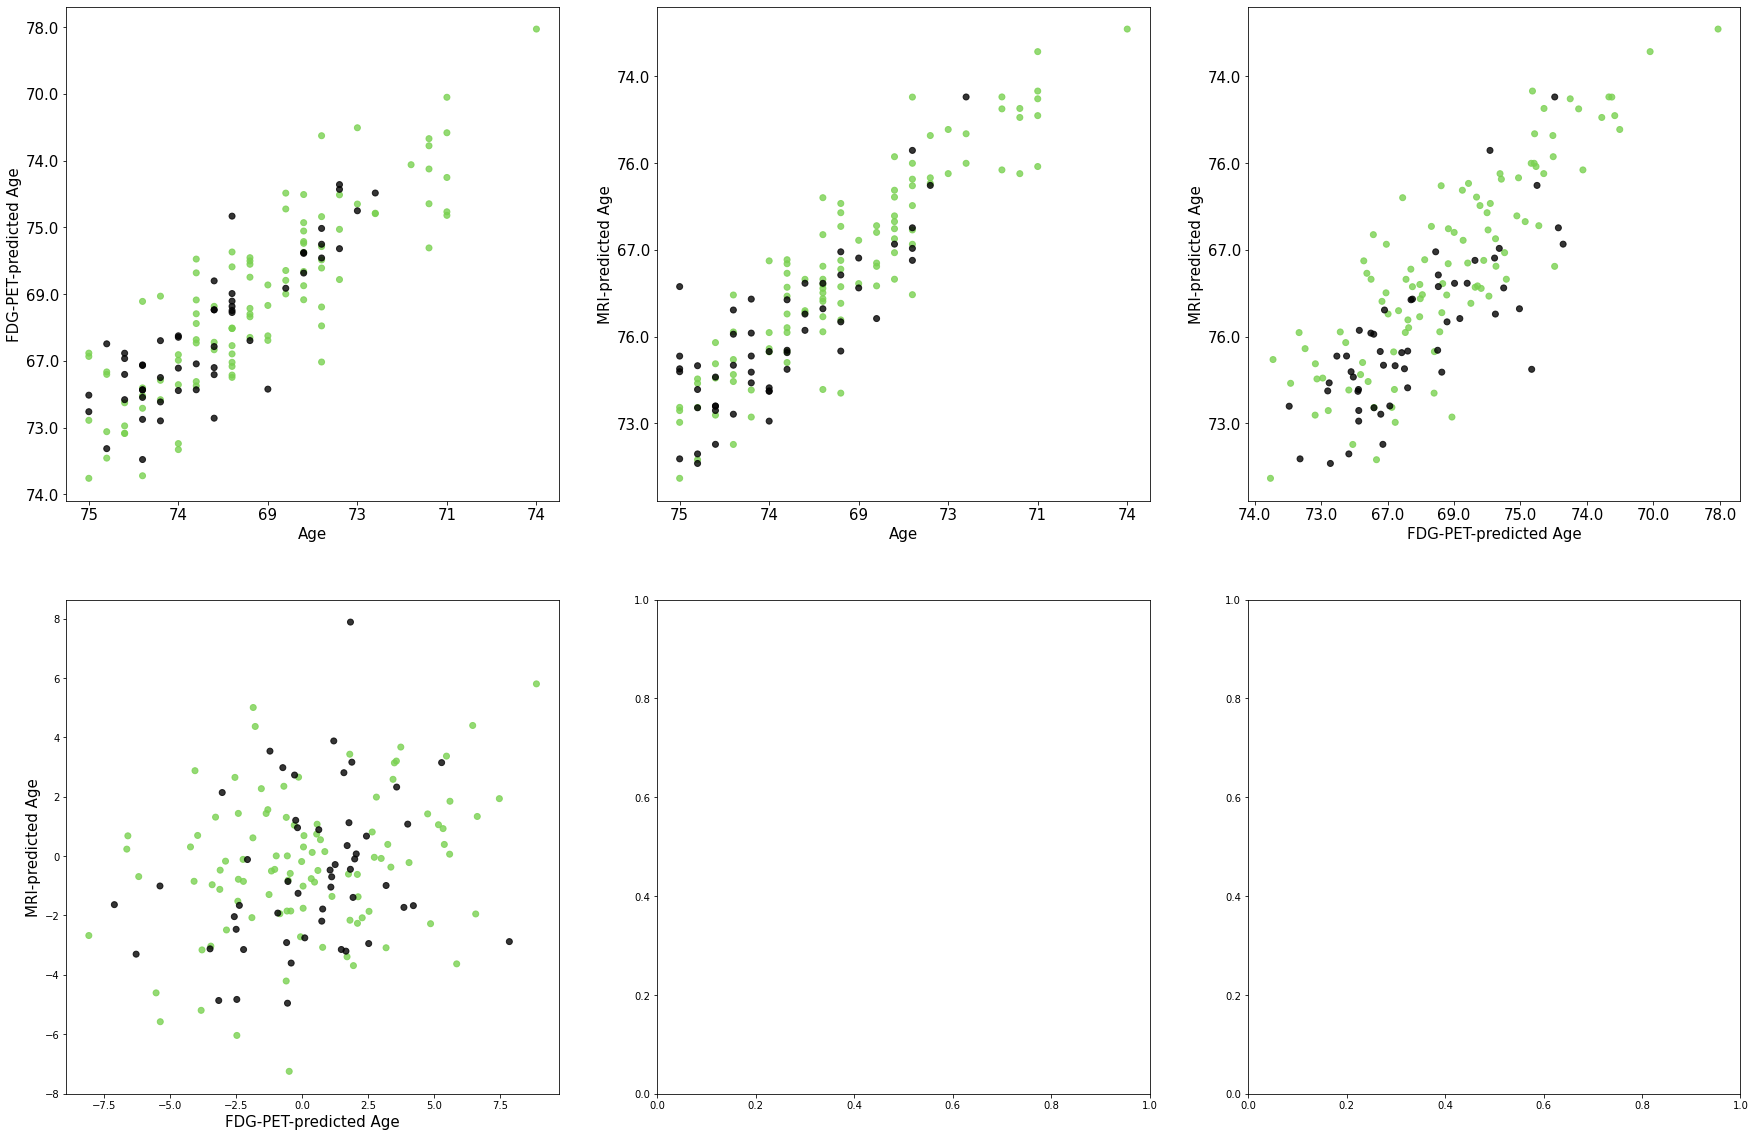

In [36]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
pet_age = pd.read_csv('../results/CN/PET-predicted_age_CN.csv')
mri_age = pd.read_csv('../results/CN/MRI-predicted_age_CN.csv')
pet_age['BPAD'] = pet_age['Prediction'] - pet_age['Age']
mri_age['BPAD'] = mri_age['Prediction'] - mri_age['Age']
cm_main = pickle.load(open("../config/plotting_config_main.p", "rb"))
y_db_cat = [0 if not "OAS" in x else 1 for x in pet_age['PTID']]
fig, ax = plt.subplots(2,3, figsize=(30, 20))
ax[0,0].scatter(pet_age['Age'], pet_age['Prediction'], c=cm_main[y_db_cat], alpha=0.8)
ax[0,0].set_xlabel('Age', fontsize=15)
ax[0,0].set_ylabel('FDG-PET-predicted Age', fontsize=15)
ax[0,0].set_xticklabels(pet_age['Age'], fontsize=15)
ax[0,0].set_yticklabels(np.round(pet_age['Prediction'], 0), fontsize=15)
ax[0,1].scatter(mri_age['Age'], mri_age['Prediction'], c=cm_main[y_db_cat], alpha=0.8)
ax[0,1].set_xlabel('Age', fontsize=15)
ax[0,1].set_ylabel('MRI-predicted Age', fontsize=15)
ax[0,1].set_xticklabels(pet_age['Age'], fontsize=15)
ax[0,1].set_yticklabels(np.round(mri_age['Prediction'], 0), fontsize=15)
ax[0,2].scatter(pet_age['Prediction'], mri_age['Prediction'], c=cm_main[y_db_cat], alpha=0.8)
ax[0,2].set_xlabel('FDG-PET-predicted Age', fontsize=15)
ax[0,2].set_ylabel('MRI-predicted Age', fontsize=15)
ax[0,2].set_xticklabels(np.round(pet_age['Prediction'], 0), fontsize=15)
ax[0,2].set_yticklabels(np.round(mri_age['Prediction'], 0), fontsize=15)
ax[1,0].scatter(pet_age['BPAD'], mri_age['BPAD'], c=cm_main[y_db_cat], alpha=0.8)
ax[1,0].set_xlabel('FDG-PET-predicted Age', fontsize=15)
ax[1,0].set_ylabel('MRI-predicted Age', fontsize=15)
#ax[1,0].set_xticklabels(np.round(pet_age['BPAD'], 0), fontsize=15)
#ax[1,0].set_yticklabels(np.round(mri_age['BPAD'], 0), fontsize=15)
plt.show()

## Validation of brain age prediction in CN

In [2]:
main(2.1, modality)

  2%|▏         | 1/50 [06:30<5:18:39, 390.19s/it]

---CROSS-VALIDATION---
 Final model (smallest MAE): svm
MAE: 2.0076450961241292, R2: 0.7989335687448084


  4%|▍         | 2/50 [12:51<5:10:07, 387.67s/it]

---CROSS-VALIDATION---
 Final model (smallest MAE): svm
MAE: 2.341163308692739, R2: 0.7414126709422544


  6%|▌         | 3/50 [19:47<5:10:10, 395.97s/it]

---CROSS-VALIDATION---
 Final model (smallest MAE): rvr
MAE: 2.335529778645363, R2: 0.7102043561686269


  8%|▊         | 4/50 [26:14<5:01:34, 393.36s/it]

---CROSS-VALIDATION---
 Final model (smallest MAE): svm
MAE: 1.6114948664954363, R2: 0.8725641463240494


 10%|█         | 5/50 [32:40<4:53:20, 391.12s/it]

---CROSS-VALIDATION---
 Final model (smallest MAE): svm
MAE: 2.359628772061966, R2: 0.7271988897648144


 12%|█▏        | 6/50 [38:52<4:42:43, 385.53s/it]

---CROSS-VALIDATION---
 Final model (smallest MAE): svm
MAE: 2.2460472686410706, R2: 0.7412908009416381


 14%|█▍        | 7/50 [45:46<4:42:25, 394.07s/it]

---CROSS-VALIDATION---
 Final model (smallest MAE): svm
MAE: 2.4305001925471355, R2: 0.7116948753110001


 16%|█▌        | 8/50 [51:46<4:28:35, 383.70s/it]

---CROSS-VALIDATION---
 Final model (smallest MAE): svm
MAE: 1.511301651796472, R2: 0.8855382247277039


 18%|█▊        | 9/50 [58:05<4:21:18, 382.40s/it]

---CROSS-VALIDATION---
 Final model (smallest MAE): rvr
MAE: 2.224623112618642, R2: 0.7678821636667645


 20%|██        | 10/50 [1:03:57<4:08:44, 373.10s/it]

---CROSS-VALIDATION---
 Final model (smallest MAE): rvr
MAE: 2.274206205603531, R2: 0.7526589494747598


 22%|██▏       | 11/50 [1:10:05<4:01:37, 371.72s/it]

---CROSS-VALIDATION---
 Final model (smallest MAE): svm
MAE: 1.4986912474106084, R2: 0.8871861401890274


 24%|██▍       | 12/50 [1:17:09<4:05:14, 387.23s/it]

---CROSS-VALIDATION---
 Final model (smallest MAE): svm
MAE: 2.2993220828197227, R2: 0.7509777600688221


 26%|██▌       | 13/50 [1:23:03<3:52:42, 377.35s/it]

---CROSS-VALIDATION---
 Final model (smallest MAE): svm
MAE: 2.3589142277480355, R2: 0.7114822511905083


 28%|██▊       | 14/50 [1:29:34<3:48:49, 381.37s/it]

---CROSS-VALIDATION---
 Final model (smallest MAE): svm
MAE: 2.540791990409333, R2: 0.6798602409649543


 30%|███       | 15/50 [1:35:40<3:39:51, 376.91s/it]

---CROSS-VALIDATION---
 Final model (smallest MAE): svm
MAE: 1.6052452028590247, R2: 0.8723645124585778


 32%|███▏      | 16/50 [1:41:11<3:25:44, 363.08s/it]

---CROSS-VALIDATION---
 Final model (smallest MAE): svm
MAE: 1.44257990627419, R2: 0.8953138022610733


 34%|███▍      | 17/50 [1:47:09<3:18:50, 361.52s/it]

---CROSS-VALIDATION---
 Final model (smallest MAE): svm
MAE: 1.6130191403881644, R2: 0.8701340810815595


 36%|███▌      | 18/50 [1:52:40<3:07:52, 352.27s/it]

---CROSS-VALIDATION---
 Final model (smallest MAE): svm
MAE: 2.3077384397188054, R2: 0.7253314479808418


 38%|███▊      | 19/50 [1:58:07<2:58:07, 344.76s/it]

---CROSS-VALIDATION---
 Final model (smallest MAE): svm
MAE: 1.4812604461608176, R2: 0.8862783806012432


 40%|████      | 20/50 [2:05:02<3:02:59, 366.00s/it]

---CROSS-VALIDATION---
 Final model (smallest MAE): svm
MAE: 2.313820327315525, R2: 0.7565734823038788


 42%|████▏     | 21/50 [2:10:57<2:55:17, 362.66s/it]

---CROSS-VALIDATION---
 Final model (smallest MAE): svm
MAE: 1.661979032492988, R2: 0.8613259739740325


 44%|████▍     | 22/50 [2:16:40<2:46:24, 356.59s/it]

---CROSS-VALIDATION---
 Final model (smallest MAE): svm
MAE: 1.605782473265621, R2: 0.8708328032980209


 46%|████▌     | 23/50 [2:22:32<2:39:54, 355.36s/it]

---CROSS-VALIDATION---
 Final model (smallest MAE): rvr
MAE: 2.2869481292134846, R2: 0.752755373690542


 48%|████▊     | 24/50 [2:28:16<2:32:30, 351.94s/it]

---CROSS-VALIDATION---
 Final model (smallest MAE): svm
MAE: 1.4946698720848632, R2: 0.8908058041039446


 50%|█████     | 25/50 [2:35:09<2:34:18, 370.34s/it]

---CROSS-VALIDATION---
 Final model (smallest MAE): svm
MAE: 1.431069296655085, R2: 0.8939977885220007


 52%|█████▏    | 26/50 [2:40:46<2:24:06, 360.29s/it]

---CROSS-VALIDATION---
 Final model (smallest MAE): svm
MAE: 2.4473278740497437, R2: 0.709084423194081


 54%|█████▍    | 27/50 [2:46:41<2:17:26, 358.56s/it]

---CROSS-VALIDATION---
 Final model (smallest MAE): svm
MAE: 1.412917779037942, R2: 0.8949802241081294


 56%|█████▌    | 28/50 [2:51:57<2:06:47, 345.78s/it]

---CROSS-VALIDATION---
 Final model (smallest MAE): svm
MAE: 1.5685121793412373, R2: 0.8680742354567599


 58%|█████▊    | 29/50 [2:57:34<2:00:10, 343.34s/it]

---CROSS-VALIDATION---
 Final model (smallest MAE): svm
MAE: 1.6340836124124987, R2: 0.8613363605597975


 60%|██████    | 30/50 [3:03:56<1:58:16, 354.80s/it]

---CROSS-VALIDATION---
 Final model (smallest MAE): svm
MAE: 2.398159728193123, R2: 0.7287293647398655


 62%|██████▏   | 31/50 [3:10:04<1:53:35, 358.72s/it]

---CROSS-VALIDATION---
 Final model (smallest MAE): svm
MAE: 2.312784877683418, R2: 0.7437729834554188


 64%|██████▍   | 32/50 [3:16:17<1:48:56, 363.16s/it]

---CROSS-VALIDATION---
 Final model (smallest MAE): svm
MAE: 1.7879729314732276, R2: 0.8316821869334915


 66%|██████▌   | 33/50 [3:22:17<1:42:34, 362.00s/it]

---CROSS-VALIDATION---
 Final model (smallest MAE): svm
MAE: 1.7696781893525848, R2: 0.8523389830697432


 68%|██████▊   | 34/50 [3:28:33<1:37:43, 366.44s/it]

---CROSS-VALIDATION---
 Final model (smallest MAE): rvr
MAE: 2.4675741723527183, R2: 0.7017483038381604


 70%|███████   | 35/50 [3:34:17<1:29:54, 359.64s/it]

---CROSS-VALIDATION---
 Final model (smallest MAE): svm
MAE: 1.703252034071126, R2: 0.8456193352862927


 72%|███████▏  | 36/50 [3:40:45<1:25:53, 368.13s/it]

---CROSS-VALIDATION---
 Final model (smallest MAE): rvr
MAE: 2.3534191817610997, R2: 0.7375662855212632


 74%|███████▍  | 37/50 [3:47:11<1:20:53, 373.37s/it]

---CROSS-VALIDATION---
 Final model (smallest MAE): svm
MAE: 1.5993930330913817, R2: 0.8656522672952116


 76%|███████▌  | 38/50 [3:54:26<1:18:23, 391.95s/it]

---CROSS-VALIDATION---
 Final model (smallest MAE): svm
MAE: 1.42988729958878, R2: 0.9016789198790219


 78%|███████▊  | 39/50 [4:00:23<1:09:54, 381.36s/it]

---CROSS-VALIDATION---
 Final model (smallest MAE): svm
MAE: 1.629599730185596, R2: 0.8688472631789312


 80%|████████  | 40/50 [4:07:03<1:04:29, 386.92s/it]

---CROSS-VALIDATION---
 Final model (smallest MAE): svm
MAE: 1.410681781617815, R2: 0.8954677421504614


 82%|████████▏ | 41/50 [4:14:24<1:00:30, 403.41s/it]

---CROSS-VALIDATION---
 Final model (smallest MAE): svm
MAE: 2.3434418951744056, R2: 0.7339207108930572


 84%|████████▍ | 42/50 [4:20:36<52:29, 393.73s/it]  

---CROSS-VALIDATION---
 Final model (smallest MAE): svm
MAE: 1.4728458516336635, R2: 0.889989489636226


 86%|████████▌ | 43/50 [4:27:59<47:40, 408.70s/it]

---CROSS-VALIDATION---
 Final model (smallest MAE): svm
MAE: 2.368331879579944, R2: 0.7265503325621289


 88%|████████▊ | 44/50 [4:34:04<39:33, 395.64s/it]

---CROSS-VALIDATION---
 Final model (smallest MAE): svm
MAE: 1.7066135484328488, R2: 0.8590018093986307


 90%|█████████ | 45/50 [4:40:01<31:59, 383.89s/it]

---CROSS-VALIDATION---
 Final model (smallest MAE): rvr
MAE: 2.1996677401333247, R2: 0.769379745859825


 92%|█████████▏| 46/50 [4:46:14<25:23, 380.76s/it]

---CROSS-VALIDATION---
 Final model (smallest MAE): svm
MAE: 1.6649247250039925, R2: 0.8545560781618874


 94%|█████████▍| 47/50 [4:51:59<18:30, 370.08s/it]

---CROSS-VALIDATION---
 Final model (smallest MAE): svm
MAE: 1.6851055914791497, R2: 0.8565866742524203


 96%|█████████▌| 48/50 [4:57:18<11:48, 354.48s/it]

---CROSS-VALIDATION---
 Final model (smallest MAE): svm
MAE: 1.682439478249463, R2: 0.8692266715011214


 98%|█████████▊| 49/50 [5:03:46<06:04, 364.53s/it]

---CROSS-VALIDATION---
 Final model (smallest MAE): svm
MAE: 2.4238816138948107, R2: 0.7150914195786011


100%|██████████| 50/50 [5:10:53<00:00, 373.07s/it]

---CROSS-VALIDATION---
 Final model (smallest MAE): svm
MAE: 1.7795644406975106, R2: 0.8400056801091257
Range of 50 iterations:
MAE: 1.3682261607549506 - 2.6588626472755075 (mean: 2.0332576233868824) 
R2: 0.5755223139974819 - 0.8953257212160948 (mean: 0.7579020390718441) 
Models:  Counter({'svm': 43, 'rvr': 7})


## Brain age prediction in MCI

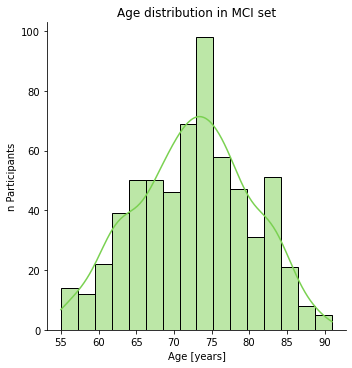

---MCI---
On average, predicted age of MCI differed by  0.7265554972863089  years from their chronological age.
MAE = 2.6795389101797533, R2 = 0.7925216881944976


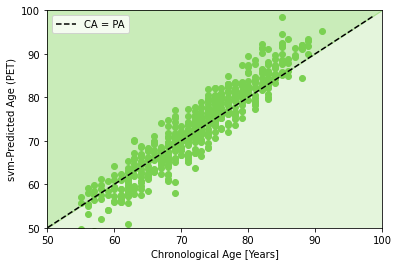

In [3]:
main(3, modality)

## Association with cognitive performance/neuropathology in CN

---SIGNIFICANT CORRELATIONS BETWEEN BPAD & NEUROPSYCHOLOGY/NEUROPATHOLOGY---
Not enough observations of PIB


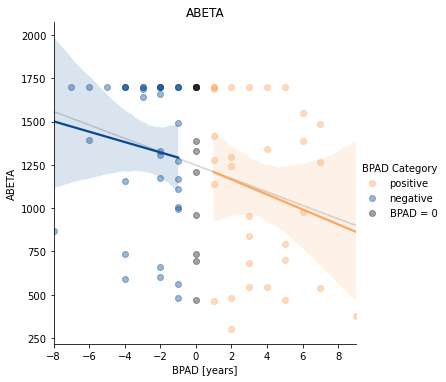

ABETA : -0.291 0.008827097125899413

---INTERACTION EFFECTS---
ABETA significant in positive BPAD:  False (-0.20033998900715294, 0.27987076116122084) 
significant in negative BPAD:  False (-0.13205211483608842, 0.442652486163181)


In [37]:
main(4.1, modality)

## Association with cognitive performance/neuropathology in MCI

---SIGNIFICANT CORRELATIONS BETWEEN BPAD & NEUROPSYCHOLOGY/NEUROPATHOLOGY---


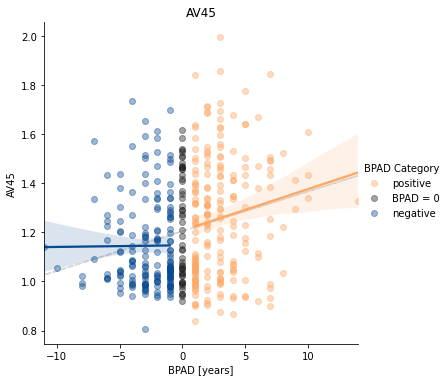

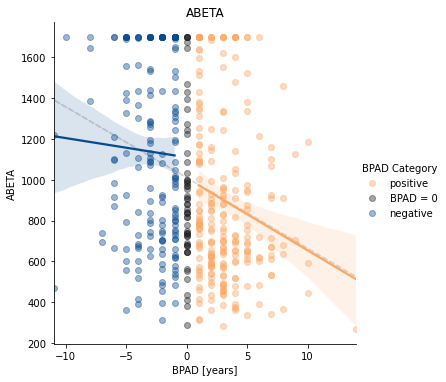

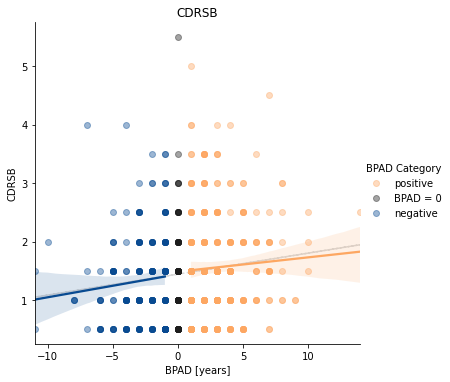

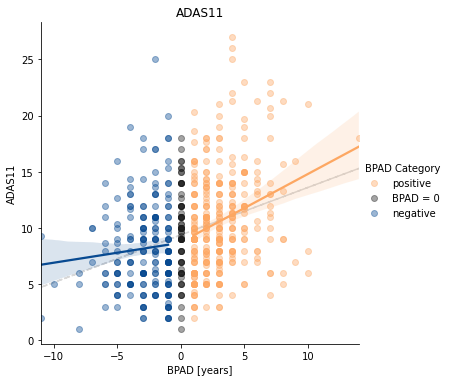

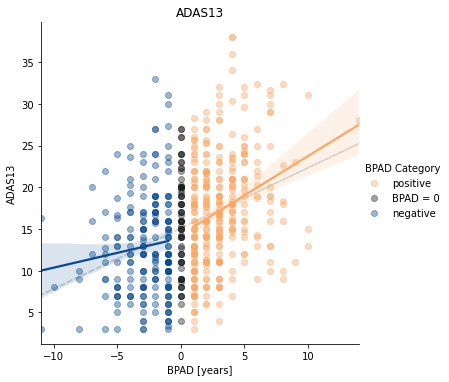

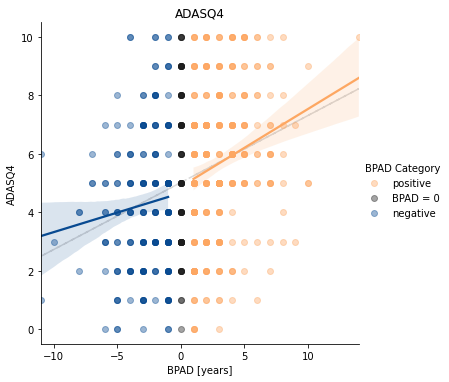

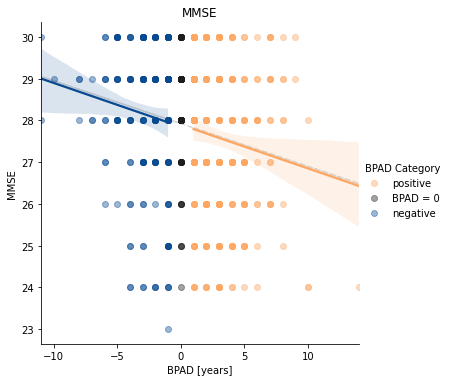

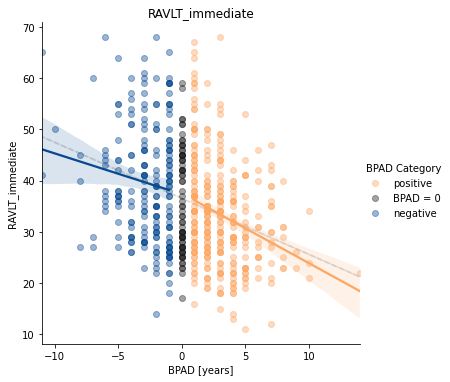

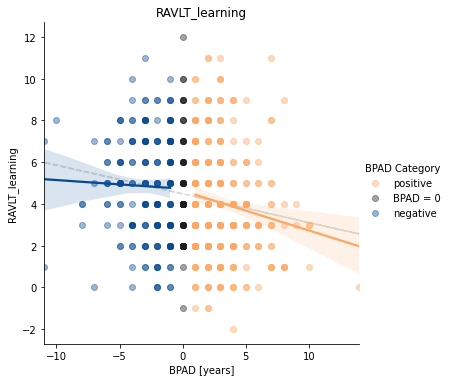

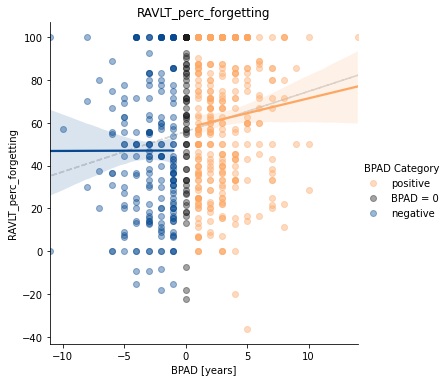

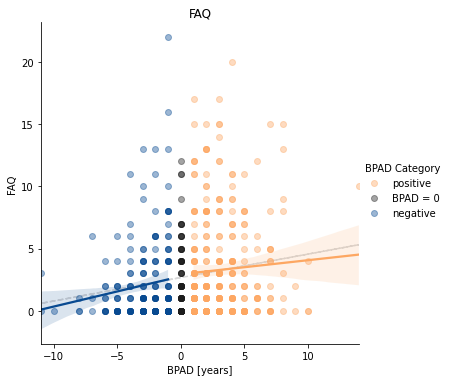

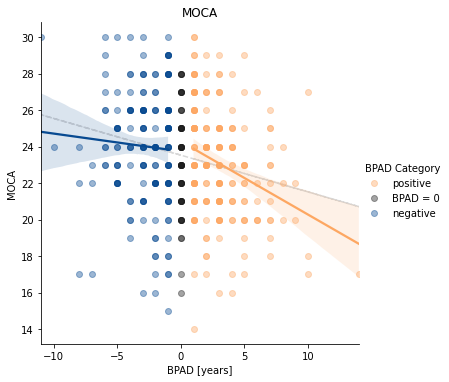

AV45 : 0.246 2.3416438591153387e-07
ABETA : -0.275 9.603795345670039e-10
CDRSB : 0.14 0.00048293833739920594
ADAS11 : 0.323 2.489401831045801e-16
ADAS13 : 0.366 8.145089874304074e-21
ADASQ4 : 0.301 2.6407644536508182e-14
MMSE : -0.195 1.0351252734825218e-06
RAVLT_immediate : -0.333 2.356231970001287e-17
RAVLT_learning : -0.18 6.691454394557658e-06
RAVLT_perc_forgetting : 0.193 1.431104370619326e-06
FAQ : 0.169 2.496275065000391e-05
MOCA : -0.222 2.491201072846904e-06

---INTERACTION EFFECTS---
AV45 significant in positive BPAD:  True (0.15527176962289063, 0.025844412489993134) 
significant in negative BPAD:  False (0.007137994891273591, 0.9259571958519635)
ABETA significant in positive BPAD:  True (-0.18688311090432788, 0.003196116237707041) 
significant in negative BPAD:  False (-0.042968982456584856, 0.5723366917876064)
CDRSB significant in positive BPAD:  False (0.05737057429695602, 0.29437843714566136) 
significant in negative BPAD:  False (0.10073581830797618, 0.1496693251659717)


In [38]:
main(4.2, modality)